In [1]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
x=np.array([56, 72, 69, 88, 102, 86, 76, 79, 94, 74])
y=np.array([92, 102, 86, 110, 130, 99, 96, 102, 105, 92])


Text(0, 0.5, 'Price')

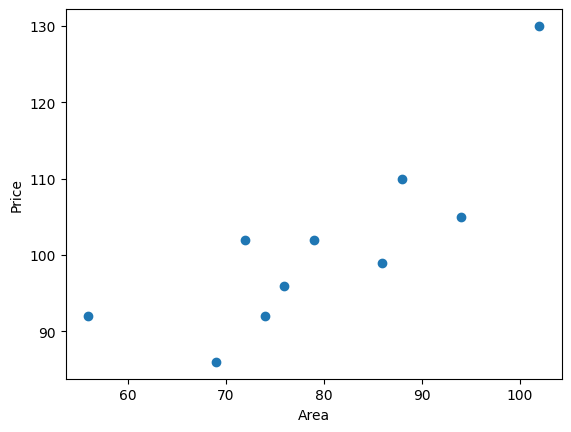

In [3]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.scatter(x, y)
plt.xlabel("Area")
plt.ylabel("Price")

In [4]:
def f(x:list,w0:float,w1:float):
    y=w0+w1*x
    return y

In [5]:
def square_loss(x: np.ndarray, y: np.ndarray, w0: float, w1: float):
    """平方损失函数"""
    loss = sum(np.square(y - (w0 + w1 * x)))
    return loss

In [6]:
def least_squares_algebraic(x: np.ndarray, y: np.ndarray):
    """最小二乘法代数求解"""
    n = x.shape[0]
    w1 = (n * sum(x * y) - sum(x) * sum(y)) / (n * sum(x * x) - sum(x) * sum(x))
    w0 = (sum(x * x) * sum(y) - sum(x) * sum(x * y)) / (
        n * sum(x * x) - sum(x) * sum(x)
    )
    return w0, w1

In [7]:
least_squares_algebraic(x, y)

(np.float64(41.33509168550616), np.float64(0.7545842753077117))

In [8]:
w0 = least_squares_algebraic(x, y)[0]
w1 = least_squares_algebraic(x, y)[1]

square_loss(x, y, w0, w1)

np.float64(447.69153479025357)

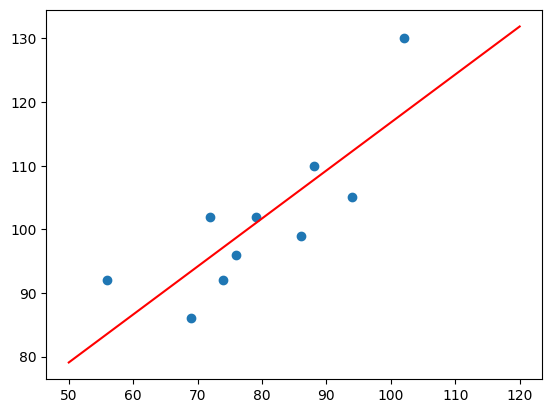

In [9]:
x_temp = np.linspace(50, 120, 100)  # 绘制直线生成的临时点

plt.scatter(x, y)
plt.plot(x_temp, x_temp * w1 + w0, "r")

In [10]:
f(150, w0, w1)

np.float64(154.5227329816629)

In [11]:
def least_squares_matrix(x:np.matrix,y:np.matrix):
    w=(x.T*x).I*x.T*y
    return w

In [12]:
x_matrix = np.matrix(np.hstack((np.ones((x.shape[0], 1)), x.reshape(x.shape[0], 1))))
y_matrix = np.matrix(y.reshape(y.shape[0], 1))
x_matrix, y_matrix

(matrix([[  1.,  56.],
         [  1.,  72.],
         [  1.,  69.],
         [  1.,  88.],
         [  1., 102.],
         [  1.,  86.],
         [  1.,  76.],
         [  1.,  79.],
         [  1.,  94.],
         [  1.,  74.]]),
 matrix([[ 92],
         [102],
         [ 86],
         [110],
         [130],
         [ 99],
         [ 96],
         [102],
         [105],
         [ 92]]))

In [13]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
least_squares_matrix(x_matrix,y_matrix)

matrix([[41.33509169],
        [ 0.75458428]])

In [15]:
from sklearn.linear_model import LinearRegression

#定义线性回归模型
model=LinearRegression()
model.fit(x.reshape(x.shape[0],1),y)

#得到模型拟合参数
model.intercept_,model.coef_

(np.float64(41.335091685506185), array([0.75458428]))

In [16]:
model.predict([[150]])

array([154.52273298])

In [17]:
import pandas as pd

url = "https://cdn.aibydoing.com/aibydoing/files/course-5-boston.csv"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

df = pd.read_csv(url, storage_options=headers)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
features=df[["crim","rm","lstat"]]
features.describe()

,crim,rm,lstat
count,506.000000,506.000000,506.000000
mean,3.593761,6.284634,12.653063
std,8.596783,0.702617,7.141062
min,0.006320,3.561000,1.730000
25%,0.082045,5.885500,6.950000
50%,0.256510,6.208500,11.360000
75%,3.647423,6.623500,16.955000
max,88.976200,8.780000,37.970000


In [19]:
target=df["medv"] #目标值数据
split_num=int(len(features)*0.7) #得到70%位置
X_train = features[:split_num] #训练集特征
y_train = target[:split_num] #训练集目标
X_test = features[split_num:] #测试集特征
y_test = target[split_num:] #测试集目标

X_train.shape, y_train.shape, X_test.shape,y_test.shape


((354, 3), (354,), (152, 3), (152,))

In [20]:
model = LinearRegression()  # 建立模型
model.fit(X_train, y_train)  # 训练模型
model.coef_, model.intercept_  # 输出训练后的模型参数和截距项

(array([ 0.69979497, 10.13564218, -0.20532653]),
 np.float64(-38.00096988969029))

In [21]:
preds = model.predict(X_test)  # 输入测试集特征进行预测
preds  # 预测结果

array([17.77439141, 21.09512448, 27.63412265, 26.78577951, 25.38313368,
       24.3286313 , 28.4257879 , 25.12834727, 16.82806601, 20.76498858,
       52.3350748 , -0.18169806, 12.01475786,  7.87878077, 15.13155699,
       32.93748235, 37.07872049, 29.50613719, 25.50800832, 12.35867972,
        9.08901644, 47.08374238, 35.31759193, 33.3738765 , 38.34913316,
       33.10414639, 91.3556125 , 35.11735022, 19.69326952, 18.49805269,
       14.03767555, 20.9235166 , 20.41406182, 21.92218226, 15.20451678,
       18.05362998, 21.26289453, 23.18192502, 15.87149504, 27.70381826,
       27.65958772, 30.17151829, 27.04987446, 21.52730227, 37.82614512,
       22.09872387, 34.71166346, 32.07959454, 29.45253042, 29.51137956,
       41.49935191, 62.4121152 , 13.64508882, 24.71242033, 18.69151684,
       37.4909413 , 54.05864658, 34.94758034, 15.01355249, 30.17849355,
       32.22191275, 33.90252834, 33.02530285, 28.4416789 , 69.60201087,
       34.7617152 , 31.65353442, 24.5644437 , 24.78130285, 24.00

In [22]:
def mae_solver(y_true:np.ndarray,y_pred:np.ndarray):
    #MAE求解
    n=len(y_true)
    mae=sum(np.abs(y_true-y_pred))/n
    return mae

In [23]:
def mse_solver(y_true: np.ndarray, y_pred: np.ndarray):
    """MSE 求解"""
    n = len(y_true)
    mse = sum(np.square(y_true - y_pred)) / n
    return mse

In [24]:
mae = mae_solver(y_test.values, preds)
mse = mse_solver(y_test.values, preds)

print("MAE: ", mae)
print("MSE: ", mse)

MAE:  13.022063072780274
MSE:  303.8331247223632


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_ = mean_absolute_error(y_test, preds)
mse_ = mean_squared_error(y_test, preds)

print("scikit-learn MAE: ", mae_)
print("scikit-learn MSE: ", mse_)

scikit-learn MAE:  13.022063072780279
scikit-learn MSE:  303.8331247223632
